## Worksheet 5

### Group 22 Eaton Heidegger and Shannon Schröder

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### a) Show that dimensionless units can be introduced, by setting \( G = M = b = 1 \). What is the relation between $\hat{r}, \hat{\rho}(\hat{r})$ and $\hat{\Phi}(\hat{r})$  in these so-called ‘N-body units’ and the corresponding quantities in physical units? The mass of a star becomes $\hat{m} = \frac{m}{M} = \frac{1}{N}$.


We are given the Plummer model formulas for the mass density 

$
\rho(r) = \frac{3M}{4\pi b^3} \left(1 + \frac{r^2}{b^2}\right)^{-5/2}
$ \
and gravitational potential: \
$
\Phi(r) = -\frac{GM}{\sqrt{r^2 + b^2}}
$

To simplify the problem, we introduce **dimensionless variables** using the standard **N-body units**:

G = M = b = 1

Therefore we can rewrite the radius, density, and potential with the dimensionless variables:
$\hat{r} = \frac{r}{b}, \quad \hat{\rho}(\hat{r}) = \frac{\rho(r)}{\rho_0}, \quad \hat{\Phi}(\hat{r}) = \frac{\Phi(r)}{\Phi_0}
$


####  Density:

When using M=G=b=1, the density becomes: \
\
$
\rho(r) = \frac{3}{4\pi} \left(1 + {r}^2\right)^{-5/2}
$

and since b=1, r= $\hat{r}$, and therefore this term becomes: \
\
$
\hat{\rho}(\hat{r}) = \rho(\hat{r}) = \frac{3}{4\pi} (1 + \hat{r}^2)^{-5/2}
$



#### Gravitational Potential:
Again,  substitute $r = b\hat{r}$, with b=1, M=1, G=1 into the potential, then this term becomes:\
\
$
\Phi(r) = -\frac{1}{\sqrt{\hat{r}^2 +1 }}
$



By setting \( G = M = b = 1 \), we obtain dimensionless quantities:

- $\hat{r} = \frac{r}{b} $
- $ \hat{\rho}(\hat{r}) = \frac{3}{4\pi} (1 + \hat{r}^2)^{-5/2}$
- $\hat{\Phi}(\hat{r}) = -\frac{1}{\sqrt{1 + \hat{r}^2}}$
- $ \hat{m} = \frac{1}{N}$

Therefore, the relation between the N-body units and the quantities in physical units is:
- $  \rho(r) = \frac{M}{b^3} \hat{\rho}(\hat{r}) $
- $  \Phi(r) = \frac{GM}{b} \hat{\Phi}(\hat{r})$ 
- $r = b\hat{r}$



###  Explicit sampling approach
#### b) Show that in the dimensionless units the density is normalised and $p_r(\hat{r})$ is the probability distribution function for the dimensionless radius

For a normalised distribution, the Integral over the function from 0 to infinity has to be 1. 

To do this, we integrate the density over all space : $\int_{\mathbb{R}^3} \hat{\rho}(\vec{r}) \, d^3\vec{r} = 1$

Due to spherical symmetry, we switch to spherical coordinates:\
\
$
\int_0^\infty \hat{\rho}(\hat{r}) \cdot 4\pi \hat{r}^2 \, d\hat{r} = 1
$

Now plug in the expression for $\hat{\rho}(\hat{r})$:

$
\int_0^\infty \left[ \frac{3}{4\pi} (1 + \hat{r}^2)^{-5/2} \right] \cdot 4\pi \hat{r}^2 \, d\hat{r}
= 3 \int_0^\infty \hat{r}^2 (1 + \hat{r}^2)^{-5/2} \, d\hat{r}
$

We use the known Integral: 

$\int_0^\infty \frac{r^2}{(1 + r^2)^{5/2}} \, dr = \frac{1}{3}$\
\
, so 

$3 \int_0^\infty \hat{r}^2 (1 + \hat{r}^2)^{5/2} \, d\hat{r} = 3 \cdot \frac{1}{3} = 1
$

Therefore, the Plummer density profile is normalised and the probability density function of the dimensionless radius is: 

$\boxed{
p_r(\hat{r}) = 4\pi \hat{r}^2 \hat{\rho}(\hat{r}) = 3 \hat{r}^2 (1 + \hat{r}^2)^{-5/2}
}$

#### c) 


To generate realistic star positions from a Plummer model, we exploit its spherical symmetry and known probability density function (PDF).

We first calculate the cumulative function by integrating the PDF from 0 to $\hat{r}$ and then calculate the inverse of the cumulative Function by using an online calculator : 

$ r = \sqrt{(1-u)^{-2/3} -1}$ \
This gives us a method to sample radii using the inversion method by using the random sampling method for u ~ Uniform(0,1) (`np.random.uniform`). The `np.random.uniform(0,1,N)` generates random values $u_i$, for a given i = 1,..., N and gives us therefore i positions for r.
The inversion method is ideal here because it's:
- Exact (no numerical approximation),

- Efficient (no rejection sampling needed),

- Uses just one uniform random number.

- The loop over i = 1,..., N is done implicitly using NumPy arrays and vectorized operations, instead of a for loop

To place the stars in 3D, we must choose a direction uniformly on the surface of a sphere. This is done by:

- Sampling $\Phi ∈ [0, 2 \pi)$ (azimuthal anlge)
- sampling $\cos\Theta ∈ [-1,1]$ (Ensured isotropic directions)
- sampling is done in the same manner, using `np.random.uniform` with the corresponding limits

Then we convert spherical to Cartesian coordinates using:
- $x = \sin\Theta \cos\Phi, y = r\sin\Theta \sin\Phi , z = r\cos\Theta $

This ensures that stars are uniformly distributed in direction, forming a spherically symmetric cluster. 

In summary, this approach is mathematically correct, computationally efficient, and produces an isotropic, spherically symmetric distribution — as expected for a Plummer model globular cluster

In [7]:
def sample_plummer_positions(N):
    """
    Sample N star positions from the Plummer model using the inversion method.
    
    Returns:
        positions: (N, 3) array of star positions in Cartesian coordinates.
    """
    # Sample radius using the inverse CDF method
    u = np.random.uniform(0, 1, N)
    r = np.sqrt((1 - u)**(-2/3) - 1)  # Inversion of CDF

    # Sample isotropic direction using spherical coordinates
    phi = np.random.uniform(0, 2 * np.pi, N)      # Azimuthal angle (0 to 2pi)
    costheta = np.random.uniform(-1, 1, N)        # Uniform in cos(theta)
    sintheta = np.sqrt(1 - costheta**2)           # From trig identity

    # Convert to Cartesian coordinates
    x = r * sintheta * np.cos(phi)
    y = r * sintheta * np.sin(phi)
    z = r * costheta

    positions = np.column_stack((x, y, z))  # shape (N, 3)
    return positions


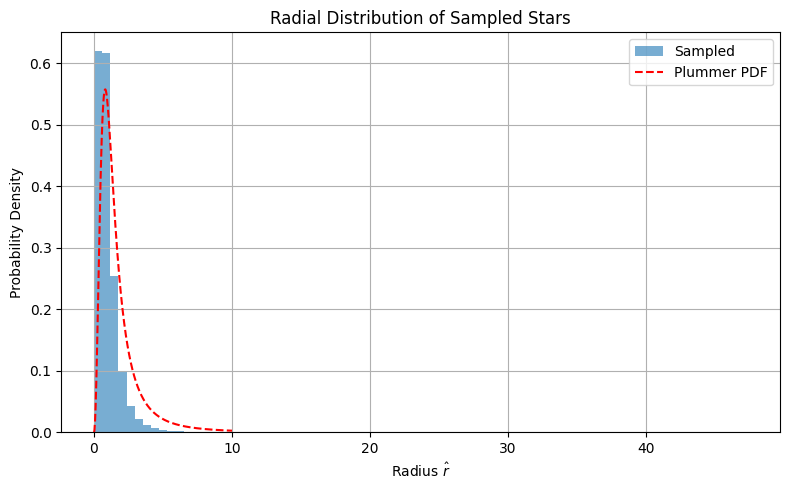

In [21]:
# Visualization of the Sampling process
# Sample positions for N stars
N = 100000
positions = sample_plummer_positions(N)
radii = np.linalg.norm(positions, axis=1)

# Histogram to check radial distribution
plt.figure(figsize=(8, 5))
plt.hist(radii, bins=80, density=True, alpha=0.6, label='Sampled')
r_vals = np.linspace(0, 10, 500)
pr = 3 * r_vals**2 * (1 + r_vals**2)**(-2.5)
plt.plot(r_vals, pr, 'r--', label='Plummer PDF')
plt.xlabel('Radius $\\hat{r}$')
plt.ylabel('Probability Density')
plt.title('Radial Distribution of Sampled Stars')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### d) Verify that the density profile of the sampled stars approaches the desired profile $\hat{\rho}(r)$ for large N.


### 2 versionen IDK ob das so stimmt

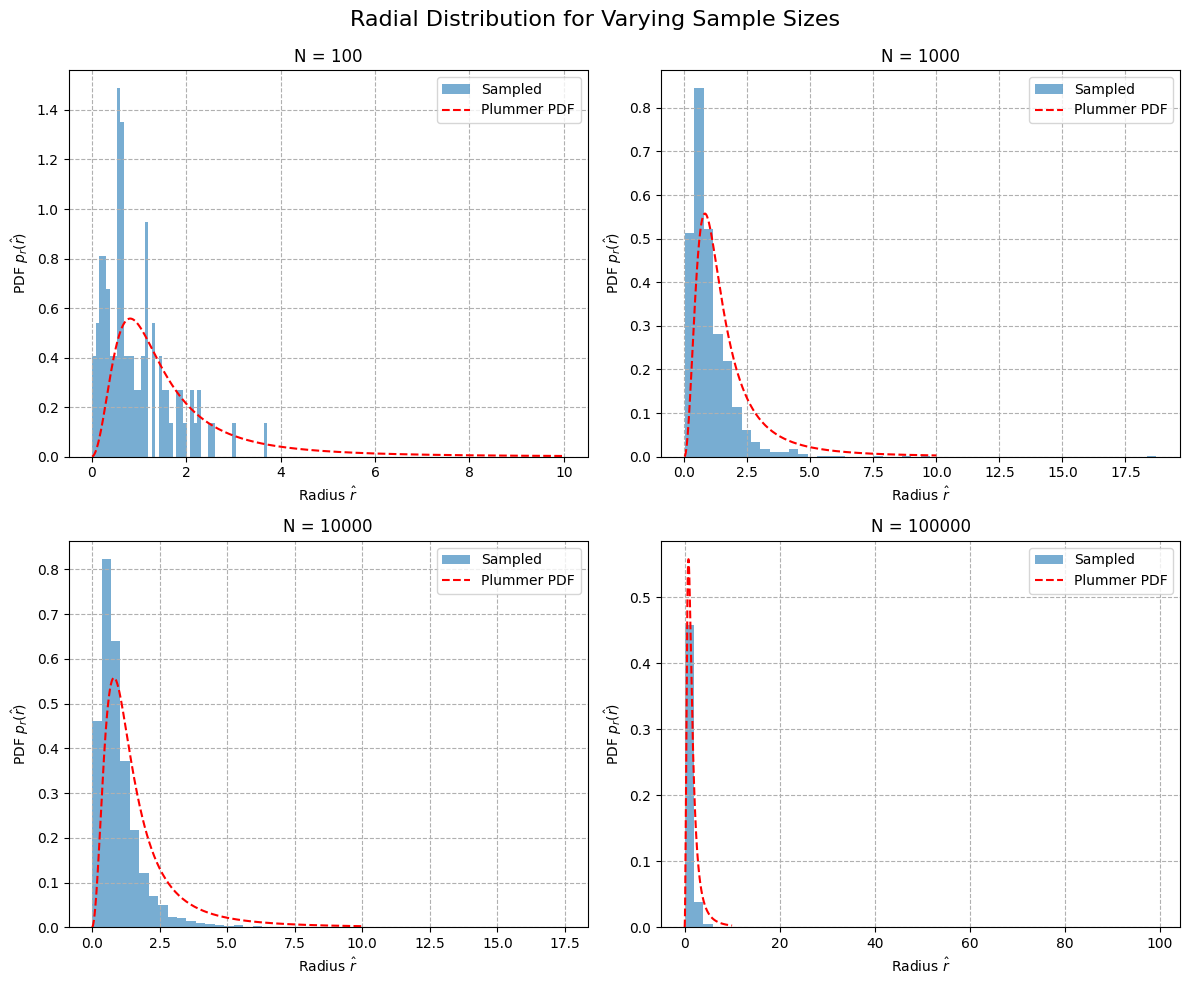

In [28]:
# Different sample sizes
Ns = [100, 1000, 10000, 100000]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, N in enumerate(Ns):
    positions = sample_plummer_positions(N)
    radii = np.linalg.norm(positions, axis=1)

    ax = axes[i // 2, i % 2]
    ax.hist(radii, bins=50, density=True, alpha=0.6, label='Sampled')
    
    r_vals = np.logspace(-2, 1, 500)
    pr = 3 * r_vals**2 * (1 + r_vals**2)**(-2.5)
    ax.plot(r_vals, pr, 'r--', label='Plummer PDF')
    ax.set_title(f"N = {N}")
    ax.set_xlabel("Radius $\\hat{r}$")
    ax.set_ylabel("PDF $p_r(\\hat{r})$")
    ax.grid(True, which='both', ls='--')
    ax.legend()

plt.suptitle("Radial Distribution for Varying Sample Sizes", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


## Version 2

In [26]:
def compute_radial_density_logbins(positions, num_bins=100):
    """
    Compute radial density using logarithmic bins to better capture wide range of scales.
    """
    r = np.linalg.norm(positions, axis=1)
    r_min = r[r > 0].min()  # avoid log(0)
    r_max = r.max()
    r_bins = np.logspace(np.log10(r_min), np.log10(r_max), num_bins + 1)
    r_centers = np.sqrt(r_bins[1:] * r_bins[:-1])  # geometric mean for center

    counts, _ = np.histogram(r, bins=r_bins)
    shell_volumes = (4/3) * np.pi * (r_bins[1:]**3 - r_bins[:-1]**3)
    density = counts / shell_volumes
    return r_centers, density


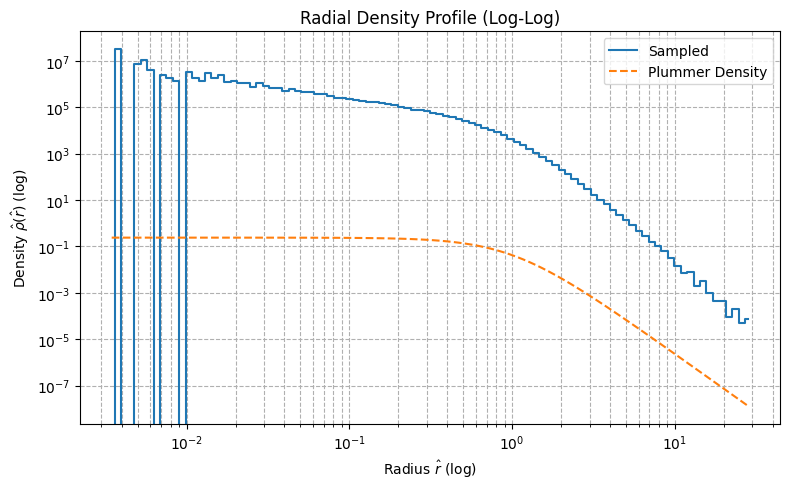

In [27]:
r_centers, density_sampled = compute_radial_density_logbins(positions)
density_theory = plummer_density(r_centers)

plt.figure(figsize=(8, 5))
plt.loglog(r_centers, density_sampled, label='Sampled', drawstyle='steps-mid')
plt.loglog(r_centers, density_theory, '--', label='Plummer Density')
plt.xlabel('Radius $\\hat{r}$ (log)')
plt.ylabel('Density $\\hat{\\rho}(\\hat{r})$ (log)')
plt.title('Radial Density Profile (Log-Log)')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()
